IMPORTING DATA

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import random
import seaborn as sns
from fbprophet import Prophet

In [ ]:
chicago_df_1 = pd.read_csv('/content/Chicago_Crimes_2001_to_2004.csv', error_bad_lines=False)
chicago_df_2 = pd.read_csv('/content/Chicago_Crimes_2005_to_2007.csv', error_bad_lines=False)
chicago_df_3 = pd.read_csv('/content/Chicago_Crimes_2008_to_2011.csv', error_bad_lines=False)
chicago_df_4 = pd.read_csv('/content/Chicago_Crimes_2012_to_2017.csv', error_bad_lines=False)


In [ ]:
chicago_df = pd.concat([chicago_df_1, chicago_df_2, chicago_df_3], ignore_index=False, axis=0)

EXPLORE THE DATA

In [ ]:
chicago_df.head(10)

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,879,4786321,HM399414,01/01/2004 12:01:00 AM,082XX S COLES AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,424.0,4.0,7.0,46.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1,2544,4676906,HM278933,03/01/2003 12:00:00 AM,004XX W 42ND PL,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True,935.0,9.0,11.0,61.0,26,1173974.0,1876757.0,2003.0,04/15/2016 08:55:02 AM,41.817229,-87.637328,"(41.817229156, -87.637328162)"
2,2919,4789749,HM402220,06/20/2004 11:00:00 AM,025XX N KIMBALL AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,False,1413.0,14.0,35.0,22.0,20,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
3,2927,4789765,HM402058,12/30/2004 08:00:00 PM,045XX W MONTANA ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,False,2521.0,25.0,31.0,20.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
4,3302,4677901,HM275615,05/01/2003 01:00:00 AM,111XX S NORMAL AVE,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,False,2233.0,22.0,34.0,49.0,06,1174948.0,1831051.0,2003.0,04/15/2016 08:55:02 AM,41.691785,-87.635116,"(41.691784636, -87.635115968)"
5,3633,4838048,HM440266,08/01/2004 12:01:00 AM,012XX S HARDING AVE,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,APARTMENT,False,False,1011.0,10.0,24.0,29.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
6,3756,4791194,HM403711,01/01/2001 11:00:00 AM,114XX S ST LAWRENCE AVE,0266,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,True,True,531.0,5.0,9.0,50.0,02,1182247.0,1829375.0,2001.0,08/29/2006 03:46:28 AM,41.687020,-87.608445,"(41.687020002, -87.60844523)"
7,4502,4679521,HM216293,03/15/2003 12:00:00 AM,090XX S RACINE AVE,5007,OTHER OFFENSE,OTHER WEAPONS VIOLATION,RESIDENCE PORCH/HALLWAY,False,False,2222.0,22.0,21.0,73.0,26,1169911.0,1844832.0,2003.0,04/15/2016 08:55:02 AM,41.729712,-87.653159,"(41.729712374, -87.653158513)"
8,4564,4792195,HM405396,09/16/2004 10:00:00 AM,003XX W HUBBARD ST,0890,THEFT,FROM BUILDING,RESIDENCE,False,False,1831.0,18.0,42.0,8.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
9,4904,4680124,HM282389,01/01/2003 12:00:00 AM,009XX S SPAULDING AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,1134.0,11.0,24.0,29.0,06,1154521.0,1895755.0,2003.0,04/15/2016 08:55:02 AM,41.869772,-87.708180,"(41.869772159, -87.708180162)"


In [ ]:
chicago_df.tail(10)

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
33179,907598,6029757,HP132565,01/17/2008 01:00:00 PM,084XX S BALTIMORE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,423.0,4.0,10.0,46.0,08B,1197482.0,1849708.0,2008.0,02/04/2016 06:33:39 AM,41.742450,-87.551998,"(41.742450258, -87.551997603)"
33180,907599,6029758,HP132539,01/19/2008 01:05:00 PM,071XX S HALSTED ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,GAS STATION,False,True,733.0,7.0,6.0,68.0,08B,1172199.0,1857618.0,2008.0,02/04/2016 06:33:39 AM,41.764749,-87.644402,"(41.764748911, -87.644401916)"
33181,907600,6029760,HP123394,01/14/2008 12:55:00 PM,001XX W 108TH PL,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,"SCHOOL, PUBLIC, GROUNDS",True,False,513.0,5.0,34.0,49.0,18,1177241.0,1833006.0,2008.0,02/04/2016 06:33:39 AM,41.697098,-87.626662,"(41.697098131, -87.626662319)"
33182,907601,6029761,HP132576,01/19/2008 09:00:00 AM,034XX S INDIANA AVE,0460,BATTERY,SIMPLE,STREET,False,False,2112.0,2.0,3.0,35.0,08B,1178168.0,1882113.0,2008.0,02/04/2016 06:33:39 AM,41.831832,-87.621781,"(41.831832202, -87.621780828)"
33183,907602,6029763,HP132011,01/19/2008 02:33:16 AM,017XX W OGDEN AVE,3800,INTERFERENCE WITH PUBLIC OFFICER,INTERFERENCE JUDICIAL PROCESS,STREET,True,False,1211.0,12.0,2.0,28.0,26,1165056.0,1899086.0,2008.0,02/04/2016 06:33:39 AM,41.878696,-87.669409,"(41.878695654, -87.669408552)"
33184,907603,6029764,HP132754,01/19/2008 03:00:00 PM,081XX S CRANDON AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,False,False,414.0,4.0,8.0,46.0,08B,1192935.0,1851459.0,2008.0,02/04/2016 06:33:39 AM,41.747367,-87.568600,"(41.747367236, -87.568600494)"
33185,907604,6029769,HP132872,01/16/2008 11:20:00 AM,099XX S AVENUE H,0460,BATTERY,SIMPLE,"SCHOOL, PUBLIC, BUILDING",False,False,432.0,4.0,10.0,52.0,08B,1202797.0,1839847.0,2008.0,02/04/2016 06:33:39 AM,41.715257,-87.532860,"(41.715256909, -87.532859912)"
33186,907605,6029770,HP133473,01/20/2008 02:30:00 AM,008XX W 33RD ST,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,924.0,9.0,11.0,60.0,14,1171118.0,1883141.0,2008.0,02/04/2016 06:33:39 AM,41.834810,-87.647618,"(41.83481046, -87.647617797)"
33187,907606,6029772,HP123572,01/14/2008 02:00:00 PM,095XX S WENTWORTH AVE,2027,NARCOTICS,POSS: CRACK,SIDEWALK,True,False,511.0,5.0,21.0,49.0,18,1176625.0,1841786.0,2008.0,02/04/2016 06:33:39 AM,41.721206,-87.628655,"(41.721205526, -87.628654671)"
33188,907607,6029773,HP133563,01/20/2008 04:30:00 AM,010XX W 47TH PL,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,921.0,9.0,3.0,61.0,08B,1170106.0,1873313.0,2008.0,02/04/2016 06:33:39,NaN,NaN,NaN


In [ ]:
print(chicago_df_1.shape)
print(chicago_df_2.shape)
print(chicago_df_3.shape)
print(chicago_df_4.shape)

(32173, 23)
(29351, 23)
(33189, 23)
(30654, 23)


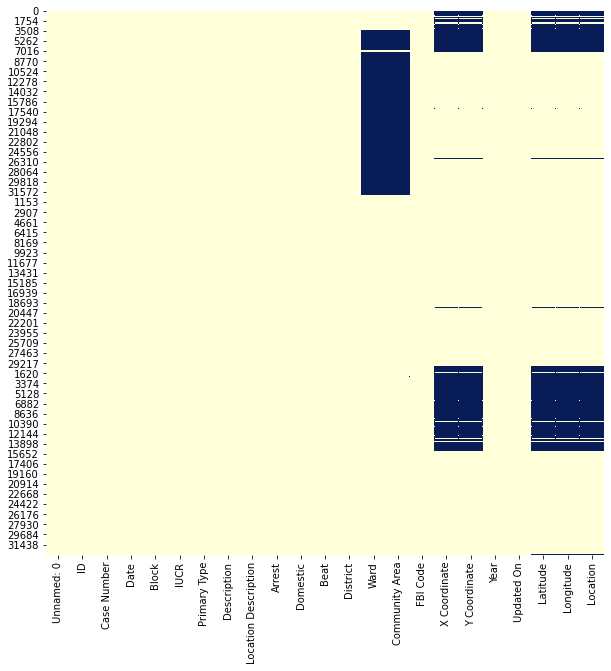

In [ ]:
# Let's see how many null elements are contained in the data
plt.figure(figsize=(10,10))
sns.heatmap(chicago_df.isnull(), cbar = False, cmap = 'YlGnBu')

In [ ]:
# ID Case Number Date Block IUCR Primary Type Description Location Description Arrest Domestic Beat District Ward Community Area FBI Code X Coordinate Y Coordinate Year Updated On Latitude Longitude Location
chicago_df.drop(['Unnamed: 0', 'Case Number', 'Case Number', 'IUCR', 'X Coordinate', 'Y Coordinate','Updated On','Year', 'FBI Code', 'Beat','Ward','Community Area', 'Location', 'District', 'Latitude' , 'Longitude'], inplace=True, axis=1)

In [ ]:
#Assembling a datetime by rearranging the dataframe column "Date". 

chicago_df.Date = pd.to_datetime(chicago_df.Date, format='%m/%d/%Y %I:%M:%S %p')

In [ ]:
chicago_df

,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
0,4786321,2004-01-01 00:01:00,082XX S COLES AVE,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False
1,4676906,2003-03-01 00:00:00,004XX W 42ND PL,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True
2,4789749,2004-06-20 11:00:00,025XX N KIMBALL AVE,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,False
3,4789765,2004-12-30 20:00:00,045XX W MONTANA ST,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,False
4,4677901,2003-05-01 01:00:00,111XX S NORMAL AVE,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,False
...,...,...,...,...,...,...,...,...
33184,6029764,2008-01-19 15:00:00,081XX S CRANDON AVE,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,False,False
33185,6029769,2008-01-16 11:20:00,099XX S AVENUE H,BATTERY,SIMPLE,"SCHOOL, PUBLIC, BUILDING",False,False
33186,6029770,2008-01-20 02:30:00,008XX W 33RD ST,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False
33187,6029772,2008-01-14 14:00:00,095XX S WENTWORTH AVE,NARCOTICS,POSS: CRACK,SIDEWALK,True,False


In [ ]:
# setting the index to be the date 
chicago_df.index = pd.DatetimeIndex(chicago_df.Date)


In [ ]:
chicago_df

,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
Date,,,,,,,,
2004-01-01 00:01:00,4786321,2004-01-01 00:01:00,082XX S COLES AVE,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False
2003-03-01 00:00:00,4676906,2003-03-01 00:00:00,004XX W 42ND PL,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True
2004-06-20 11:00:00,4789749,2004-06-20 11:00:00,025XX N KIMBALL AVE,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,False
2004-12-30 20:00:00,4789765,2004-12-30 20:00:00,045XX W MONTANA ST,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,False
2003-05-01 01:00:00,4677901,2003-05-01 01:00:00,111XX S NORMAL AVE,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,False
...,...,...,...,...,...,...,...,...
2008-01-19 15:00:00,6029764,2008-01-19 15:00:00,081XX S CRANDON AVE,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,False,False
2008-01-16 11:20:00,6029769,2008-01-16 11:20:00,099XX S AVENUE H,BATTERY,SIMPLE,"SCHOOL, PUBLIC, BUILDING",False,False
2008-01-20 02:30:00,6029770,2008-01-20 02:30:00,008XX W 33RD ST,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False


In [ ]:
#how many crimes are done of each type
chicago_df['Primary Type'].value_counts()

THEFT                               20725
BATTERY                             16248
CRIMINAL DAMAGE                     10822
NARCOTICS                           10478
OTHER OFFENSE                        6113
ASSAULT                              5263
BURGLARY                             4601
MOTOR VEHICLE THEFT                  4327
DECEPTIVE PRACTICE                   3483
ROBBERY                              3202
CRIMINAL TRESPASS                    2695
OFFENSE INVOLVING CHILDREN           1158
HOMICIDE                             1052
PROSTITUTION                         1004
WEAPONS VIOLATION                     873
CRIM SEXUAL ASSAULT                   692
SEX OFFENSE                           690
PUBLIC PEACE VIOLATION                485
LIQUOR LAW VIOLATION                  174
ARSON                                 153
INTERFERENCE WITH PUBLIC OFFICER      123
KIDNAPPING                            115
GAMBLING                              106
STALKING                          

In [ ]:
chicago_df['Primary Type'].value_counts().iloc[:15]

THEFT                         20725
BATTERY                       16248
CRIMINAL DAMAGE               10822
NARCOTICS                     10478
OTHER OFFENSE                  6113
ASSAULT                        5263
BURGLARY                       4601
MOTOR VEHICLE THEFT            4327
DECEPTIVE PRACTICE             3483
ROBBERY                        3202
CRIMINAL TRESPASS              2695
OFFENSE INVOLVING CHILDREN     1158
HOMICIDE                       1052
PROSTITUTION                   1004
WEAPONS VIOLATION               873
Name: Primary Type, dtype: int64

In [ ]:
chicago_df['Primary Type'].value_counts().iloc[:15].index

Index(['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'OTHER OFFENSE',
       'ASSAULT', 'BURGLARY', 'MOTOR VEHICLE THEFT', 'DECEPTIVE PRACTICE',
       'ROBBERY', 'CRIMINAL TRESPASS', 'OFFENSE INVOLVING CHILDREN',
       'HOMICIDE', 'PROSTITUTION', 'WEAPONS VIOLATION'],
      dtype='object')

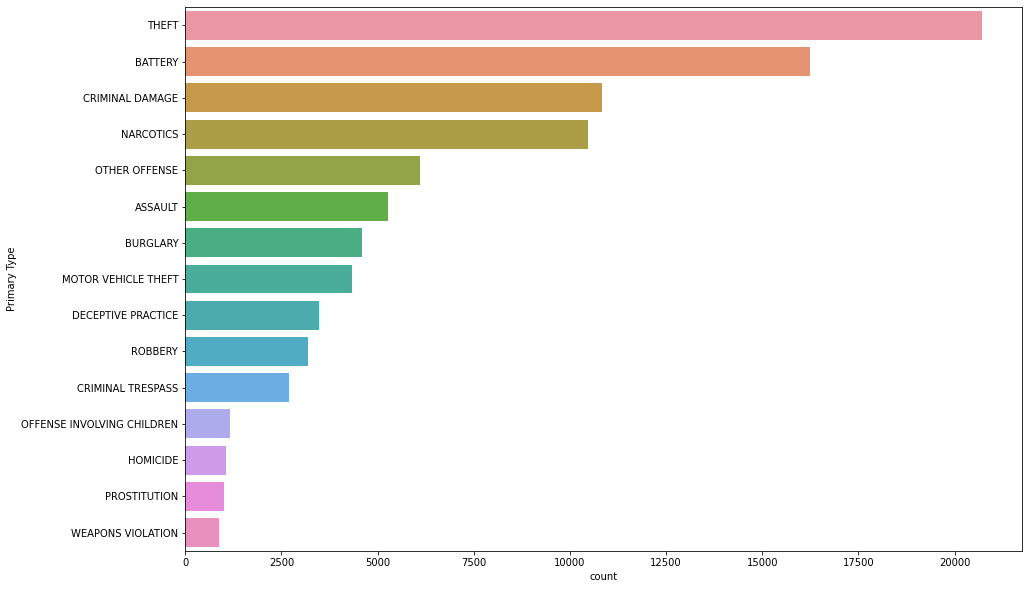

In [ ]:
plt.figure(figsize = (15, 10))
sns.countplot(y= 'Primary Type', data = chicago_df, order = chicago_df['Primary Type'].value_counts().iloc[:15].index)

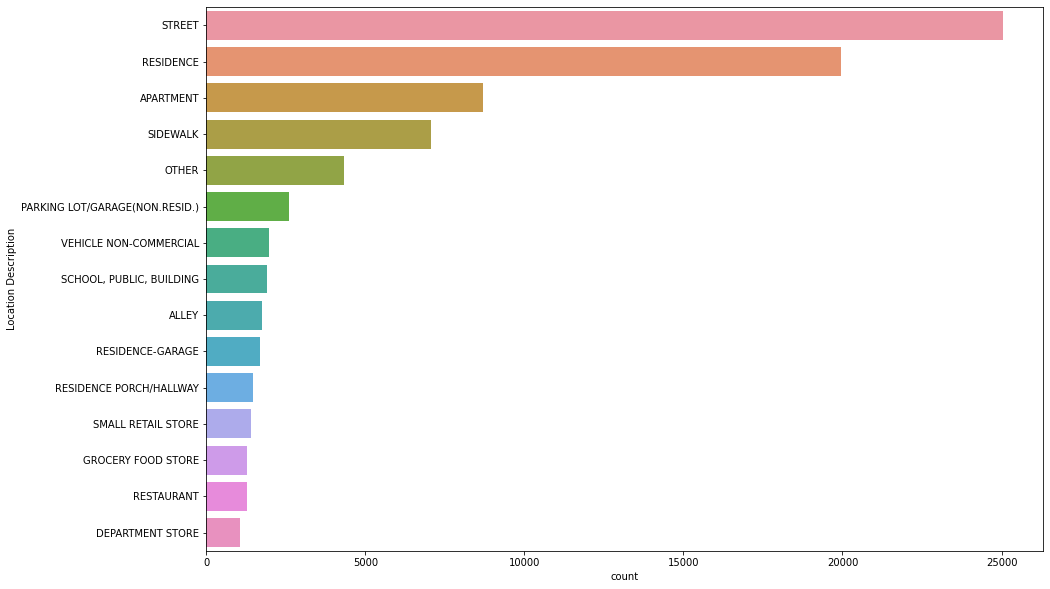

In [ ]:
#based on location description
plt.figure(figsize = (15, 10))
sns.countplot(y= 'Location Description', data = chicago_df, order = chicago_df['Location Description'].value_counts().iloc[:15].index)

In [ ]:
#how many crime occous in aspecific year
chicago_df.resample('Y').size()

Date
2001-12-31    25813
2002-12-31     4174
2003-12-31      979
2004-12-31     1207
2005-12-31      544
2006-12-31    28807
2007-12-31        0
2008-12-31    24939
2009-12-31     6222
2010-12-31     1493
2011-12-31      535
Freq: A-DEC, dtype: int64

Text(0, 0.5, 'Number of Crimes')

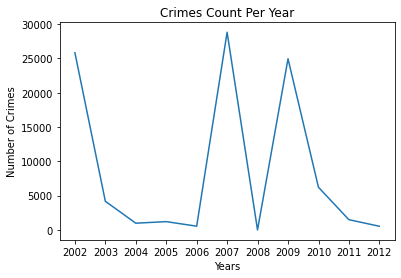

In [ ]:
# Resample is a Convenience method for frequency conversion and resampling of time series.

plt.plot(chicago_df.resample('Y').size())
plt.title('Crimes Count Per Year')
plt.xlabel('Years')
plt.ylabel('Number of Crimes')

In [ ]:
#based on month
chicago_df.resample('M').size()


Date
2001-01-31    24872
2001-02-28       51
2001-03-31       59
2001-04-30       89
2001-05-31       62
              ...  
2011-08-31       47
2011-09-30       38
2011-10-31       51
2011-11-30       42
2011-12-31       43
Freq: M, Length: 132, dtype: int64

Text(0, 0.5, 'Number of Crimes')

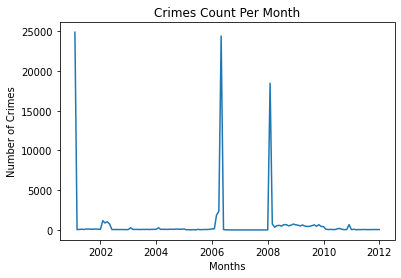

In [ ]:
# Resample is a Convenience method for frequency conversion and resampling of time series.

plt.plot(chicago_df.resample('M').size())
plt.title('Crimes Count Per Month')
plt.xlabel('Months')
plt.ylabel('Number of Crimes')

In [ ]:
#quarter
chicago_df.resample('Q').size()

Date
2001-03-31    24982
2001-06-30      257
2001-09-30      303
2001-12-31      271
2002-03-31     3064
2002-06-30      830
2002-09-30      150
2002-12-31      130
2003-03-31      402
2003-06-30      174
2003-09-30      186
2003-12-31      217
2004-03-31      416
2004-06-30      232
2004-09-30      266
2004-12-31      293
2005-03-31       60
2005-06-30      109
2005-09-30      126
2005-12-31      249
2006-03-31     4347
2006-06-30    24459
2006-09-30        0
2006-12-31        1
2007-03-31        0
2007-06-30        0
2007-09-30        0
2007-12-31        0
2008-03-31    19539
2008-06-30     1591
2008-09-30     1841
2008-12-31     1968
2009-03-31     1720
2009-06-30     1369
2009-09-30     1632
2009-12-31     1501
2010-03-31      205
2010-06-30      237
2010-09-30      291
2010-12-31      760
2011-03-31      145
2011-06-30      134
2011-09-30      120
2011-12-31      136
Freq: Q-DEC, dtype: int64

Text(0, 0.5, 'Number of Crimes')

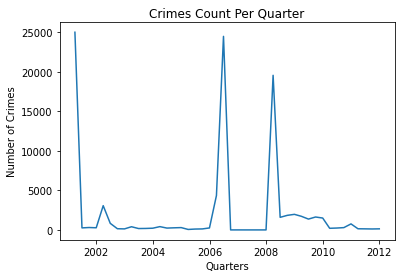

In [ ]:
# Resample is a Convenience method for frequency conversion and resampling of time series.

plt.plot(chicago_df.resample('Q').size())
plt.title('Crimes Count Per Quarter')
plt.xlabel('Quarters')
plt.ylabel('Number of Crimes')

 PREPARING THE DATA

In [ ]:
chicago_prophet = chicago_df.resample('M').size().reset_index()

In [ ]:
chicago_prophet

,Date,0
0,2001-01-31,24872
1,2001-02-28,51
2,2001-03-31,59
3,2001-04-30,89
4,2001-05-31,62
...,...,...
127,2011-08-31,47
128,2011-09-30,38
129,2011-10-31,51
130,2011-11-30,42


In [ ]:
chicago_prophet.columns = ['Date', 'Crime Count']

In [ ]:
chicago_prophet

,Date,Crime Count
0,2001-01-31,24872
1,2001-02-28,51
2,2001-03-31,59
3,2001-04-30,89
4,2001-05-31,62
...,...,...
127,2011-08-31,47
128,2011-09-30,38
129,2011-10-31,51
130,2011-11-30,42


In [ ]:
chicago_prophet_df = pd.DataFrame(chicago_prophet)

In [ ]:
chicago_prophet_df

,Date,Crime Count
0,2001-01-31,24872
1,2001-02-28,51
2,2001-03-31,59
3,2001-04-30,89
4,2001-05-31,62
...,...,...
127,2011-08-31,47
128,2011-09-30,38
129,2011-10-31,51
130,2011-11-30,42


MAKE PREDICTIONS¶

In [ ]:
chicago_prophet_df.columns

Index(['Date', 'Crime Count'], dtype='object')

In [ ]:
chicago_prophet_df_final = chicago_prophet_df.rename(columns={'Date':'ds', 'Crime Count':'y'})


In [ ]:
chicago_prophet_df_final

,ds,y
0,2001-01-31,24872
1,2001-02-28,51
2,2001-03-31,59
3,2001-04-30,89
4,2001-05-31,62
...,...,...
127,2011-08-31,47
128,2011-09-30,38
129,2011-10-31,51
130,2011-11-30,42


In [ ]:
m = Prophet()
m.fit(chicago_prophet_df_final)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
# Forcasting into the future
future = m.make_future_dataframe(periods=365*2)
forecast = m.predict(future)

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2001-01-31,1186.292252,618.774429,8648.909171,1186.292252,1186.292252,3399.080243,3399.080243,3399.080243,3399.080243,3399.080243,3399.080243,0.0,0.0,0.0,4585.372496
1,2001-02-28,1180.362332,-3075.564594,5154.101592,1180.362332,1180.362332,-309.826007,-309.826007,-309.826007,-309.826007,-309.826007,-309.826007,0.0,0.0,0.0,870.536325
2,2001-03-31,1173.797064,-3152.623752,5018.322557,1173.797064,1173.797064,-298.440489,-298.440489,-298.440489,-298.440489,-298.440489,-298.440489,0.0,0.0,0.0,875.356575
3,2001-04-30,1167.443578,-1434.611509,6459.888675,1167.443578,1167.443578,1555.839324,1555.839324,1555.839324,1555.839324,1555.839324,1555.839324,0.0,0.0,0.0,2723.282902
4,2001-05-31,1160.878309,-3431.546596,4730.726028,1160.878309,1160.878309,-553.852667,-553.852667,-553.852667,-553.852667,-553.852667,-553.852667,0.0,0.0,0.0,607.025642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857,2013-12-26,188.412655,-4175.708436,3903.719609,188.411856,188.413422,-343.297557,-343.297557,-343.297557,-343.297557,-343.297557,-343.297557,0.0,0.0,0.0,-154.884902
858,2013-12-27,188.200883,-4322.319025,3796.454709,188.200082,188.201652,-383.306260,-383.306260,-383.306260,-383.306260,-383.306260,-383.306260,0.0,0.0,0.0,-195.105377
859,2013-12-28,187.989110,-4550.296234,3683.830667,187.988308,187.989882,-424.933239,-424.933239,-424.933239,-424.933239,-424.933239,-424.933239,0.0,0.0,0.0,-236.944129
860,2013-12-29,187.777338,-4132.729486,3948.791213,187.776533,187.778111,-466.649467,-466.649467,-466.649467,-466.649467,-466.649467,-466.649467,0.0,0.0,0.0,-278.872129


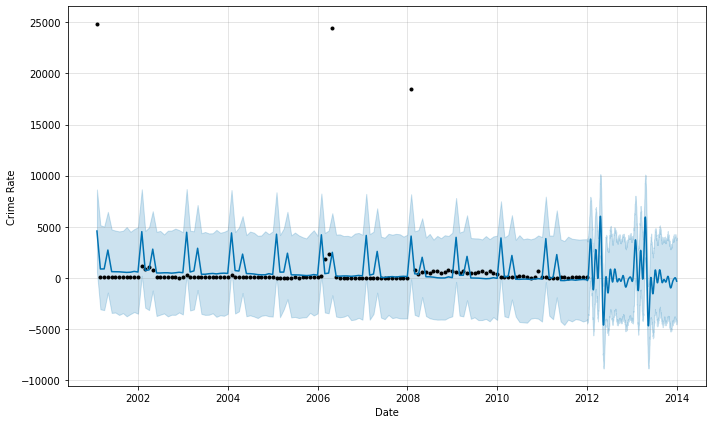

In [ ]:
figure = m.plot(forecast, xlabel='Date', ylabel='Crime Rate')

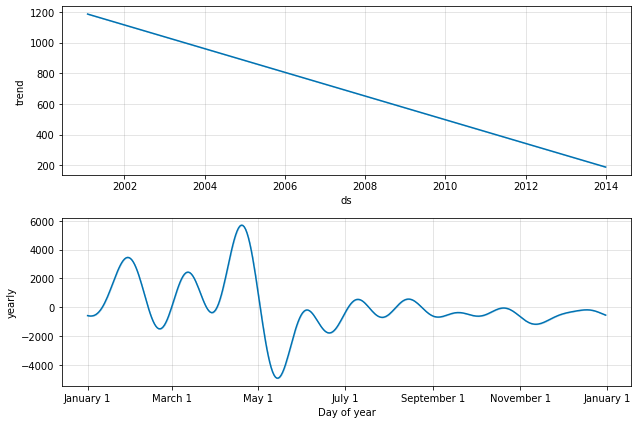

In [ ]:
figure3 = m.plot_components(forecast)